<a href="https://colab.research.google.com/github/flammarionick/Summative-Linear-Regression-Model-Deployment-Using-Flutter/blob/main/Summative_Linear_Regression_Model_Deployment_Using_Flutter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving AirQuality.csv to AirQuality (2).csv


In [17]:
import pandas as pd

# List the uploaded files
uploaded_file_path = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(uploaded_file_path, sep=';')

# Display the first few rows
df.head()



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [18]:
# 3. Drop columns with all NaN and unnecessary columns
df.dropna(axis=1, how='all', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)


In [19]:
# 4. Replace commas with dots and convert to numeric
df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df = df.apply(pd.to_numeric, errors='coerce')

df


<ipython-input-19-a2848412f4c2>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 5. Drop rows with missing values
df.dropna(inplace=True)

df


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [21]:
# Remove invalid C6H6(GT) values (e.g. negative or extremely low)
df = df[df['C6H6(GT)'] >= 0]

df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [22]:
# 6. Define features and target
features = [
    "PT08.S2(NMHC)", "PT08.S5(O3)", "PT08.S4(NO2)", "PT08.S1(CO)"
]
target = "C6H6(GT)"

# X = df[features]
# y = df[target]

In [23]:
# Correlation check
correlation = df.corr()['C6H6(GT)'].abs().sort_values(ascending=False)

In [24]:
# # Step: Feature Selection based on Correlation
# correlation_matrix = df.corr()
# target = 'C6H6(GT)'
# correlation = correlation_matrix[target].abs().sort_values(ascending=False)

# Select top N features (e.g., top 5 excluding the target itself)
top_features = correlation.index[1:6]  # Skipping the target itself at index 0

print("Top correlated features:", top_features)

# Use only the top features
X = df[top_features]
y = df[target]

Top correlated features: Index(['PT08.S2(NMHC)', 'PT08.S1(CO)', 'PT08.S5(O3)', 'PT08.S4(NO2)',
       'PT08.S3(NOx)'],
      dtype='object')


In [25]:
# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# 8. Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [30]:
# 9. Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [31]:
# 10. Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [32]:
# Evaluation
results = {
    'Linear Regression': (mean_squared_error(y_test, lr_pred), r2_score(y_test, lr_pred)),
    'Decision Tree': (mean_squared_error(y_test, dt_pred), r2_score(y_test, dt_pred)),
    'Random Forest': (mean_squared_error(y_test, rf_pred), r2_score(y_test, rf_pred)),
}

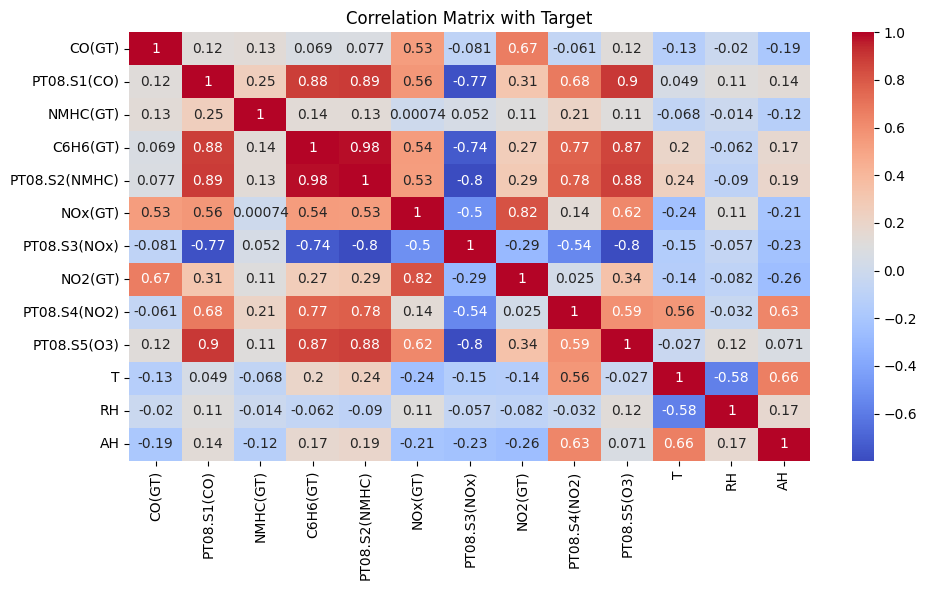

In [33]:
# Visualization: Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Target')
plt.tight_layout()
plt.show()

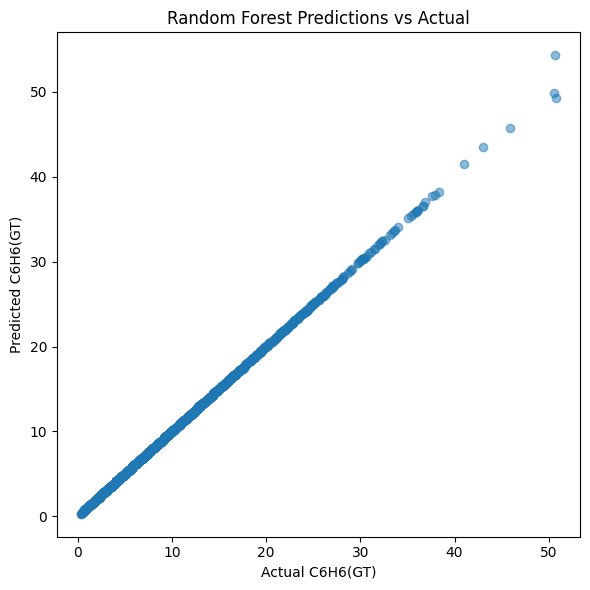

In [34]:
# Visualization: Actual vs Predicted for Random Forest
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual C6H6(GT)")
plt.ylabel("Predicted C6H6(GT)")
plt.title("Random Forest Predictions vs Actual")
plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

# Cross-validation R²
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
cv_r2_mean = np.mean(cv_scores)

# Cross-validation MSE
cv_predictions = cross_val_predict(rf_model, X, y, cv=5)
cv_mse = mean_squared_error(y, cv_predictions)

# Build result table
results_df = pd.DataFrame({
    'Model': list(results.keys()) + ['Random Forest (CV)'],
    'MSE': [results[k][0] for k in results] + [cv_mse],
    'R²': [results[k][1] for k in results] + [cv_r2_mean]
})

In [36]:
print(results_df)

                Model       MSE        R²
0   Linear Regression  1.590546  0.972320
1       Decision Tree  0.004108  0.999929
2       Random Forest  0.009881  0.999828
3  Random Forest (CV)  0.048183  0.999317


In [37]:
# import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison Results", dataframe=results_df)

correlation.head()  # Returning top correlated features for manual inspection

,C6H6(GT)
C6H6(GT),1.000000
PT08.S2(NMHC),0.981950
PT08.S1(CO),0.883795
PT08.S5(O3),0.865689
PT08.S4(NO2),0.765731


In [38]:
# 12. Save the best model
joblib.dump(rf_model, "best_aqi_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [40]:
from google.colab import files

# Download the saved model file
files.download("best_aqi_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>